In [1]:
import requests
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import altair as alt


In [5]:
data = pd.read_csv('wholesale_customers_data.csv')

In [12]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
data.shape

(440, 8)

In [9]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [11]:
print(data.isna().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [15]:
data[['Fresh','Milk','Grocery', 'Frozen', 'Detergents_Paper','Delicassen']].agg(['mean','var', 'min','median','max','sum'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,1.200030e+04,5.796266e+03,7.951277e+03,3.071932e+03,2.881493e+03,1.524870e+03
var,1.599549e+08,5.446997e+07,9.031010e+07,2.356785e+07,2.273244e+07,7.952997e+06
min,3.000000e+00,5.500000e+01,3.000000e+00,2.500000e+01,3.000000e+00,3.000000e+00
median,8.504000e+03,3.627000e+03,4.755500e+03,1.526000e+03,8.165000e+02,9.655000e+02
max,1.121510e+05,7.349800e+04,9.278000e+04,6.086900e+04,4.082700e+04,4.794300e+04
sum,5.280131e+06,2.550357e+06,3.498562e+06,1.351650e+06,1.267857e+06,6.709430e+05


In [17]:
from sklearn.preprocessing import StandardScaler




# Standardize the data
scaler = StandardScaler()
data_data_scaled = scaler.fit_transform(data)

# Show the first few rows of the scaled data
pd.DataFrame(data_data_scaled, columns=data.columns).head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data_data_scaled_df_X = pd.DataFrame(data_data_scaled, columns=data.columns)


X = data_data_scaled_df_X[['Fresh', 'Milk']].values


Region_names = data['Region'].values

k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

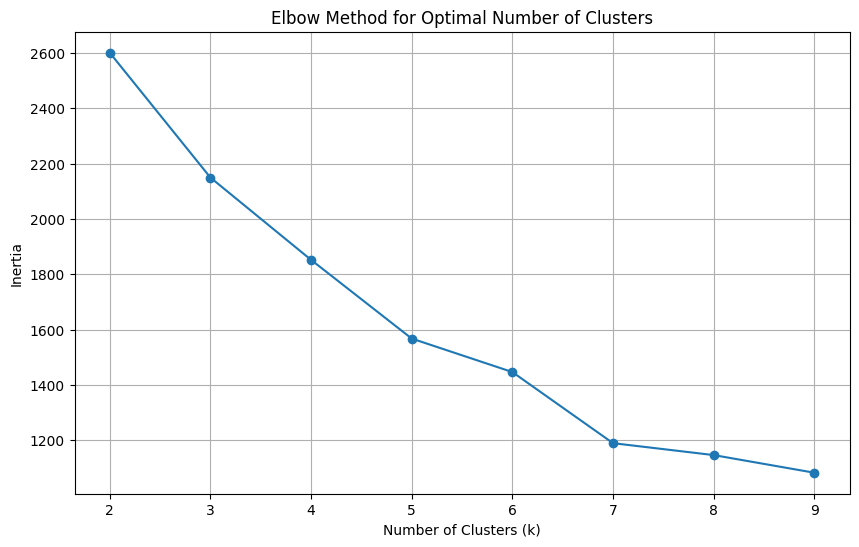

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize variables
inertia_values = []
k_range = range(2, 10)  # We will check for up to 10 clusters

# Run K-means with different k values and store the inertia (sum of squared distances)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

We choose 7 clusters

In [23]:
data_data_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

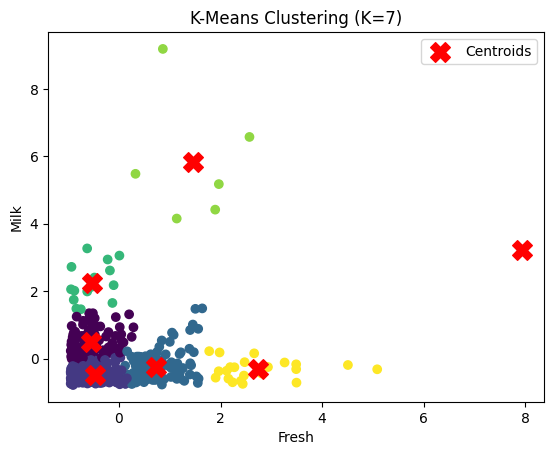

In [29]:
from sklearn.cluster import KMeans


data_data_scaled_df_X = pd.DataFrame(data_data_scaled, columns=data.columns)


X = data_data_scaled_df_X[['Fresh', 'Milk']].values

k = 7
# Fit the K-Means model
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title(f'K-Means Clustering (K={k})')
plt.legend()
plt.show()

In [ ]:
PCA

In [28]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(data_data_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

# Concatenating the principal components with the target variable 'Survived'
final_df = pd.concat([principal_df, data['Channel']], axis=1)

# Display the resulting DataFrame
print(final_df.head())

# Explaining the variance
print("Explained variance by component:", pca.explained_variance_ratio_)

   Principal Component 1  Principal Component 2  Channel
0               0.843939              -0.515351        2
1               1.062676              -0.484601        2
2               1.269141               0.682055        2
3              -1.056782               0.610821        1
4               0.634030               0.974199        2
Explained variance by component: [0.38750123 0.22374588]


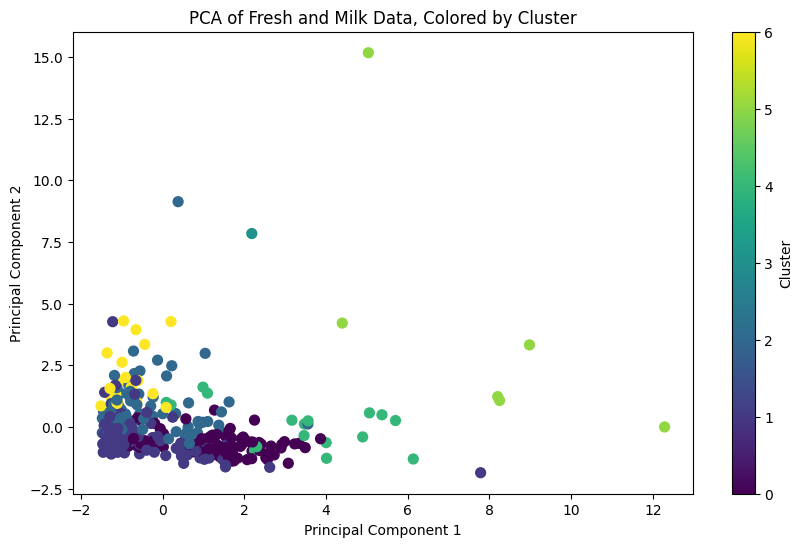

In [30]:
# Add the cluster labels to the principal component dataframe
principal_df['Cluster_Labels'] = cluster_labels

# Scatter plot of the PCA results, colored by cluster
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'],
            c=principal_df['Cluster_Labels'], cmap='viridis', s=50)

# Add plot labels and title
plt.title('PCA of Fresh and Milk Data, Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [33]:
X = data.drop('Milk', axis=1)

y = data['Milk']
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model_ols = LinearRegression()
model_el = ElasticNet()
model_rf = RandomForestRegressor(n_estimators=25)
model_ols.fit(X_train, y_train)
model_el.fit(X_train, y_train)
model_rf.fit(X_train, y_train)


print('Model OLS' + ' ' + str(model_ols.score(X_test, y_test)))
print('Model EL' + ' ' + str(model_el.score(X_test, y_test)))
print('Model RF' + ' ' + str(model_rf.score(X_test, y_test)))

Model OLS 0.49668130369735763
Model EL 0.49579490975649343
Model RF 0.5900118196561444
